# Local Averages

In [1]:
import numpy as np
import scipy as sp
import importlib
import seaborn as sns
import matplotlib.pyplot as plt
import pdb

import sys
sys.path.append("../../")
import pyApproxTools as pat
importlib.reload(pat)

%matplotlib inline

## Local Averages

Now we are interested in local averages - where we integrate $v(x)$ against some compactly supported molifier function $\varphi_\varepsilon$, that is we find $\int \varphi_{\varepsilon}(x - x_0) v(x) \, \mathrm{d} x$. We find a Riesz representer $\omega_{x_0, \varepsilon}$ of this local integration, that is we define
$$
\langle \omega_{x_0, \varepsilon}, v \rangle = \int \varphi_{\varepsilon}(x - x_0) v(x) \, \mathrm{d} x 
$$

In the case where $\varphi_{\varepsilon} = \mathbb{1}_{[x_0 - \varepsilon/2, x_0 + \varepsilon/2]}$, and our space is $H_0^1([0,1])$, we have that
$$
\omega_{x_0, \varepsilon}(x) = \frac{1}{\sqrt{x_0-\varepsilon/6 + x_0^2}}
\begin{cases}
(1-x_0) x & \text{for } x \le x_0-\varepsilon/2 \\
(1-x_0) x - \frac{1}{2}\frac{(x-(x_0-\varepsilon/2))^2}{\epsilon} & \text{for } x_0 - \varepsilon/2 < x \le x_0+\varepsilon/2 \\
x_0 (1 - x)  & \text{for } x > x_0 + \varepsilon/2
\end{cases}
$$


### Projections

First we just want to see the performance of the projection on to a basis of uniformly spaced local averages for $m\to\infty$ with a variety of $\varepsilon$. We test this against a single function that is made up of sinusoids with random coefficients, i.e.
$$
v(x) = \sum_{k=1}^N \frac{y_k}{1+k^2}\sin(k \pi x)
$$
where $y_k\sim \mathcal{U}([-1,1])$ are IID uniformly distributed.

We then produce, for a variety of $\varepsilon$ (from about $1\times 10^{-2}$ to $1\times 10^{-4}$) a series of evenly spaced local averages as our basis, i.e. we take
$$
W_m = \mathrm{span}\{ \omega_{x_k, \varepsilon} : x_k = \varepsilon/2 + k / m \text{ for } k=0\ldots m-1 \}
$$
for $m$ ranging from 10 to something higher. Note that this allows the local averages to overlap.

We then plot $\| v - P_{W_m} v \|_{H_0^1}$ against $m$ for each choice of $\varepsilon$.

In [35]:
# Lets test with a function made of random sinusoids with decaying coefficients... (i.e. in some)
num_components = 200
np.random.seed(1)
v_c = 2 * np.random.random(num_components) - 1
for i in range(1,num_components+1):
    v_c[i-1] *= 1.0 / (1.0 + i*i)
v = pat.FuncVector(params=[range(1,101)], coeffs=[v_c], funcs=['H1UISin'])

Wm_plot = pat.make_unif_avg_basis(10, 0.05)
v_W, v_c = Wm_plot.project(v, return_coeffs=True)

#epsilons = [5e-2, 2.5e-2, 1e-2, 5e-3, 2.5e-3, 1e-3, 5e-4]
adj = 1 / (100*num_components + 1)
epsilons = [5e-2, 2.5e-2, 1e-2, 5e-3, 2.5e-3, 1e-3, 5e-4]
m_range = range(10,200)
err = np.zeros((len(epsilons), len(m_range)))

# Compute projection error for various epsilon and m
print('Converging uniform local averages for epsilon = ', end='')
for i, epsilon in enumerate(epsilons):
    print(str(epsilon) + '... ', end='')
    for j, m in enumerate(m_range):
        Wm = pat.make_unif_avg_basis(m, epsilon-adj)
        v_W = Wm.project(v)
        err[i,j] = (v - v_W).norm()

Converging uniform local averages for epsilon = 0.05... 0.025... 0.01... 0.005... 0.0025... 0.001... 0.0005... 

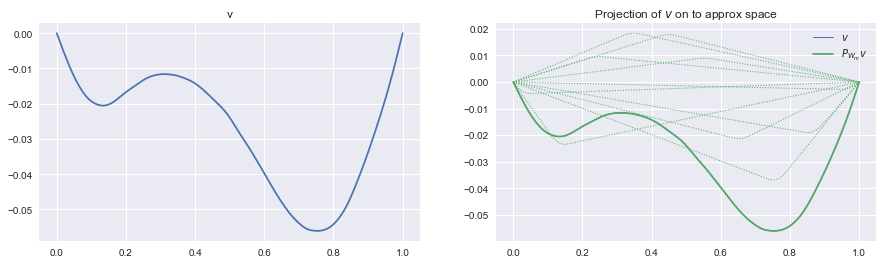

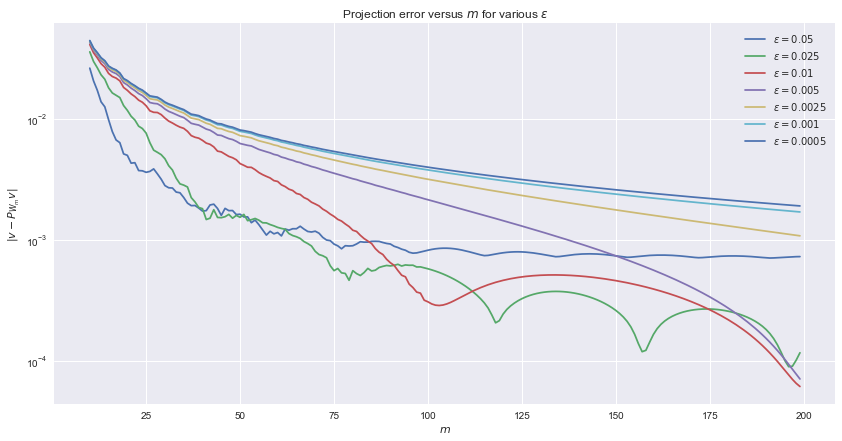

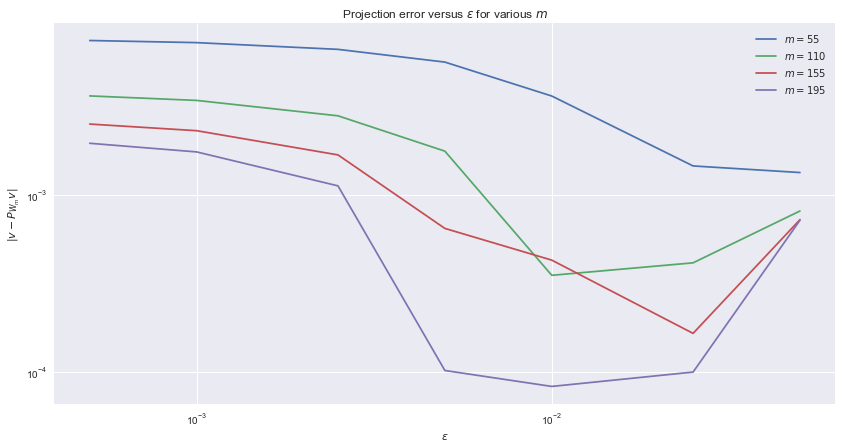

In [38]:
xs = np.arange(0.0, 1.005, 0.005)

sns.set_palette('deep')
cp = sns.color_palette()
fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(1, 2, 1, title='v')
plt.plot(xs, v.evaluate(xs), label=r'$v$')
ax = fig.add_subplot(1, 2, 2, title='Projection of $v$ on to approx space')
plt.plot(xs, v.evaluate(xs), label=r'$v$', linewidth=1)
plt.plot(xs, v_W.evaluate(xs), label=r'$P_{W_m} v$')
for i in range(Wm_plot.n):
    plt.plot(xs, (Wm_plot.vecs[i].evaluate(xs))*v_c[i], ':', linewidth=1, color=cp[1])
plt.legend()
plt.show()

# Compute projection error for various epsilon and m
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(1, 1, 1, title=r'Projection error versus $m$ for various $\varepsilon$')
for i, epsilon in enumerate(epsilons):
    plt.semilogy(m_range, err[i,:], label=r'$\varepsilon={{{0}}}$'.format(epsilon))
ax.set(xlabel=r'$m$', ylabel=r'$\|v - P_{W_m} v\|$')
plt.legend()
plt.show()

# Pick some m and plot against epsilon...
ms = [55, 110, 155, 195]
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(1, 1, 1, title=r'Projection error versus $\varepsilon$ for various $m$')
for i, m_sel in enumerate(ms):
    plt.loglog(epsilons, err[:,m_range.index(m_sel)], label=r'$m={{{0}}}$'.format(m_sel))
ax.set(xlabel=r'$\varepsilon$', ylabel=r'$\|v - P_{W_m} v\|$')
plt.legend()
plt.show()

Note that there is a spike in error every time that $\varepsilon = 1/m$... This makes sense, but lets take a closer look at $m=20$ and $m=21$ when $\varepsilon=0.05, just to make sure something isn't going terribly wrong

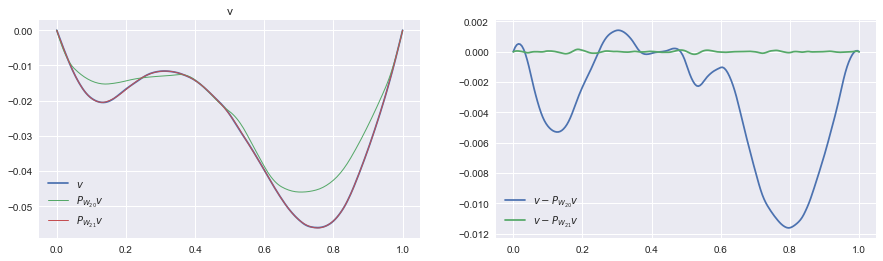

In [31]:
Wm = pat.make_unif_avg_basis(20, 0.05)
v_W, v_c = Wm.project(v, return_coeffs=True)
Wm2 = pat.make_unif_avg_basis(21, 0.05)
v_W2, v_c2 = Wm2.project(v, return_coeffs=True)

xs = np.arange(0.0, 1.005, 0.005)

sns.set_palette("deep",8)
cp = sns.color_palette()
fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(1, 2, 1, title='v')
plt.plot(xs, v.evaluate(xs), label=r'$v$')
plt.plot(xs, v_W.evaluate(xs), label=r'$P_{W_{20}} v$', linewidth=1)
plt.plot(xs, v_W2.evaluate(xs), label=r'$P_{W_{21}} v$', linewidth=1)
plt.legend()
ax = fig.add_subplot(1, 2, 2, title='')
plt.plot(xs, (v-v_W).evaluate(xs), label=r'$v - P_{W_{20}} v$')
plt.plot(xs, (v-v_W2).evaluate(xs), label=r'$v - P_{W_{21}} v$')
plt.legend()
plt.show()

### Now we try the Collective OMP and Worst-Case OMP algorithms for this problem

We look at the results both with $\varepsilon=0.01$ and $0.0025$ for both algorithms

In [17]:
N = 1e3
eps_0 = 0.04 # Re run with this
eps_1 = 0.025
eps_2 = 0.01
eps_3 = 0.0025
dictionaries = [pat.make_unif_dictionary(N), pat.make_unif_avg_dictionary(N, eps_1),\
                pat.make_unif_avg_dictionary(N, eps_2), pat.make_unif_avg_dictionary(N, eps_3)]

ns = [20,40]
np.random.seed(3)
#n = 20
m = 150
bs_comp = np.zeros((len(ns), m, len(dictionaries)))
bs_wcomp = np.zeros((len(ns), m, len(dictionaries)))
bs_rand = np.zeros((len(ns), m))
bs_avg = np.zeros((len(ns), m))

Vn = pat.make_sin_basis(ns[-1])
Wms_comp = []
Wms_wcomp = []
Wms_avg = []
Wms_rand = []

for k, dictionary in enumerate(dictionaries):
    for j, n in enumerate(ns):

        #gbc = pat.CollectiveOMP(m, dictionary, Vn.subspace(slice(0,n)), verbose=True)
        #Wm_comp = gbc.construct_basis()
        #Wms_comp.append(Wm_comp)
        #Wm_comp_o = Wm_comp.orthonormalise()

        wcgbc = pat.WorstCaseOMP(m, dictionary, Vn.subspace(slice(0,n)), verbose=True)
        Wm_wcomp = wcgbc.construct_basis()
        Wms_wcomp.append(Wm_wcomp)
        Wm_wcomp_o = Wm_wcomp.orthonormalise()

        # For efficiency it makes sense to compute the basis pair and the associated
        # cross-gramian only once, then sub sample it as we grow m...
        #BP_comp_l = pat.BasisPair(Wm_comp_o, Vn.subspace(slice(0,n)))
        BP_wcomp_l = pat.BasisPair(Wm_wcomp_o, Vn.subspace(slice(0,n)))

        for i in range(n, m):
            #BP_comp = BP_comp_l.subspace(Wm_indices=slice(0,i))
            #bs_comp[j, i, k] = BP_comp.beta()

            BP_wcomp =  BP_wcomp_l.subspace(Wm_indices=slice(0,i))
            bs_wcomp[j, i, k] = BP_wcomp.beta()

for j, n in enumerate(ns):

    Wm_rand = pat.make_random_delta_basis(m)
    Wms_rand.append(Wm_rand)
    Wm_rand_o = Wm_rand.orthonormalise()

    # For efficiency it makes sense to compute the basis pair and the associated
    # cross-gramian only once, then sub sample it as we grow m...
    BP_rand_l = pat.BasisPair(Wm_rand_o, Vn.subspace(slice(0,n)))

    for i in range(n, m):
        BP_rand = BP_rand_l.subspace(Wm_indices=slice(0,i))
        bs_rand[j, i] = BP_rand.beta()



Generating basis from greedy algorithm with dictionary: 
i 	 || P_Vn (w - P_Wm w) ||
1 : 	 0.1535379542068806
2 : 	 0.23725663206188435
3 : 	 0.322581908262289
4 : 	 0.18747875804312494
5 : 	 0.3487198714881529
6 : 	 0.2420819326034826
7 : 	 0.24454226326855955
8 : 	 0.190394415832625
9 : 	 0.2015426855513094
10 : 	 0.1463250600397137
11 : 	 0.17758165745102866
12 : 	 0.17542391100909396
13 : 	 0.1693791371831832
14 : 	 0.27709559842475445
15 : 	 0.2679966232564185
16 : 	 0.28051620132499927
17 : 	 0.2359328007312586
18 : 	 0.1658057966165071
19 : 	 0.1499893390367136
20 : 	 0.15291048834334445
21 : 	 0.11775307094605503
22 : 	 0.10337371083642416
23 : 	 0.14962743187876382
24 : 	 0.09911943879506219
25 : 	 0.0762420091070697
26 : 	 0.08354190035810469
27 : 	 0.07063614253497302
28 : 	 0.08076787503290435
29 : 	 0.08278455763346071
30 : 	 0.07091946101839441
31 : 	 0.06962401125088
32 : 	 0.07583148222129574
33 : 	 0.08846703407402308
34 : 	 0.09812533346301648
35 : 	 0.0804349457719

141 : 	 0.007679101434410883
142 : 	 0.008421106802935563
143 : 	 0.0061162019046950705
144 : 	 0.0065461459636615635
145 : 	 0.006826446844901801
146 : 	 0.012316222296254939
147 : 	 0.007551108658635536
148 : 	 0.008010908303770659
149 : 	 0.006017261724238686


Done!


Generating basis from greedy algorithm with dictionary: 
i 	 || P_Vn (w - P_Wm w) ||
1 : 	 0.15937284686876843
2 : 	 0.23498782753302644
3 : 	 0.3185192647122945
4 : 	 0.18274847767569657
5 : 	 0.3406990486852145
6 : 	 0.23934350361718879
7 : 	 0.23682569662354633
8 : 	 0.19635763419551192
9 : 	 0.19672237379949212
10 : 	 0.1391875979181463
11 : 	 0.17082662738586046
12 : 	 0.23785762239171493
13 : 	 0.22054476009747817
14 : 	 0.22686799238236
15 : 	 0.2652188446064217
16 : 	 0.30296415626138967
17 : 	 0.24887436901661722
18 : 	 0.13490737774944578
19 : 	 0.2232420492338681
20 : 	 0.11925016877719824
21 : 	 0.12157616598378135
22 : 	 0.08155193281127088
23 : 	 0.08676639466514552
24 : 	 0.053879479174875
25 : 	 0.0830

137 : 	 3.785241656967947e-05
Error: tried to add a non-orthogonal vector to an orthonormal system
138 : 	 3.1314546895866435e-05
Error: tried to add a non-orthogonal vector to an orthonormal system
139 : 	 2.4140685971910103e-05
Error: tried to add a non-orthogonal vector to an orthonormal system
140 : 	 2.214846511564006e-05
Error: tried to add a non-orthogonal vector to an orthonormal system
141 : 	 3.0038086202499592e-05
Error: tried to add a non-orthogonal vector to an orthonormal system
142 : 	 2.56375746171128e-05
Error: tried to add a non-orthogonal vector to an orthonormal system
143 : 	 2.5428273285693637e-05
Error: tried to add a non-orthogonal vector to an orthonormal system
144 : 	 2.4063806963917078e-05
Error: tried to add a non-orthogonal vector to an orthonormal system
145 : 	 2.61370594478727e-05
Error: tried to add a non-orthogonal vector to an orthonormal system
146 : 	 2.8574256429408917e-05
Error: tried to add a non-orthogonal vector to an orthonormal system
147 : 

125 : 	 0.000178458502310401
Error: tried to add a non-orthogonal vector to an orthonormal system
126 : 	 0.00022764712784131835
Error: tried to add a non-orthogonal vector to an orthonormal system
127 : 	 0.00014584512804637767
Error: tried to add a non-orthogonal vector to an orthonormal system
128 : 	 0.00016740126459106885
Error: tried to add a non-orthogonal vector to an orthonormal system
129 : 	 0.00016000848459231387
Error: tried to add a non-orthogonal vector to an orthonormal system
130 : 	 0.00012812720096935792
Error: tried to add a non-orthogonal vector to an orthonormal system
131 : 	 0.0001209676329586018
Error: tried to add a non-orthogonal vector to an orthonormal system
132 : 	 0.00015505706732327207
Error: tried to add a non-orthogonal vector to an orthonormal system
133 : 	 0.00010820589658399465
Error: tried to add a non-orthogonal vector to an orthonormal system
134 : 	 0.00011323795176657048
Error: tried to add a non-orthogonal vector to an orthonormal system
135

24 : 	 0.11010957176872997
25 : 	 0.12540709418568452
26 : 	 0.1312667686291707
27 : 	 0.0967739439128487
28 : 	 0.11796745823491873
29 : 	 0.15619897013338901
30 : 	 0.10499281955618633
31 : 	 0.10570259545922947
32 : 	 0.10200808120304607
33 : 	 0.08540845710022629
34 : 	 0.14023333620553174
35 : 	 0.10681837992841946
36 : 	 0.11968828879730747
37 : 	 0.1438746833736405
38 : 	 0.11061060481217275
39 : 	 0.10689218250790994
40 : 	 0.0725796325677327
41 : 	 0.09081796866278817
42 : 	 0.12272128698748803
43 : 	 0.07753099073806786
44 : 	 0.04561717134273553
45 : 	 0.055608799092618746
46 : 	 0.04338491202016891
47 : 	 0.03706585160562287
48 : 	 0.03996569802098393
49 : 	 0.03875881280638582
50 : 	 0.04624766688068067
51 : 	 0.03500155021747504
52 : 	 0.03864006388183239
53 : 	 0.07164909396156438
54 : 	 0.06267431863551459
55 : 	 0.051585045315078654
56 : 	 0.041859414265738484
57 : 	 0.03572003593124766
58 : 	 0.05105912523043897
59 : 	 0.032488089519636554
60 : 	 0.04095219757356369
6

139 : 	 0.004075127690258945
140 : 	 0.0034147064981101816
141 : 	 0.0027629366516906395
142 : 	 0.002965967624635815
143 : 	 0.002384329301574936
144 : 	 0.0034830045039893204
145 : 	 0.0023823808318009787
146 : 	 0.001993707316003443
147 : 	 0.002300116287989415
148 : 	 0.001883498896151331
149 : 	 0.0019263055569977844


Done!


Generating basis from greedy algorithm with dictionary: 
i 	 || P_Vn (w - P_Wm w) ||
1 : 	 0.11015398888527145
2 : 	 0.16494275520593968
3 : 	 0.2178751996747231
4 : 	 0.14571759532078155
5 : 	 0.20492951913367385
6 : 	 0.15329700703451551
7 : 	 0.12336731144584395
8 : 	 0.1926817918810163
9 : 	 0.16538376834076635
10 : 	 0.13628885464791274
11 : 	 0.1375391572841193
12 : 	 0.17091883779170994
13 : 	 0.15061468311405324
14 : 	 0.12443929742840959
15 : 	 0.1279711134596441
16 : 	 0.15357454070419688
17 : 	 0.13396287461368347
18 : 	 0.1364592396863757
19 : 	 0.14968177805079114
20 : 	 0.13485265340684213
21 : 	 0.16116130914538063
22 : 	 0.12448515146999524
2

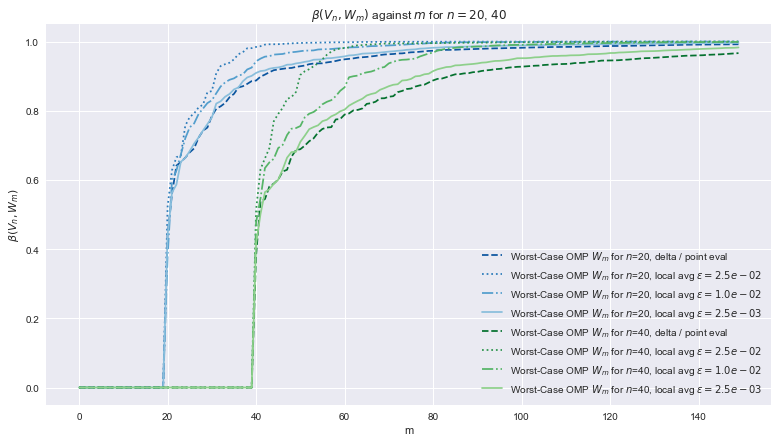

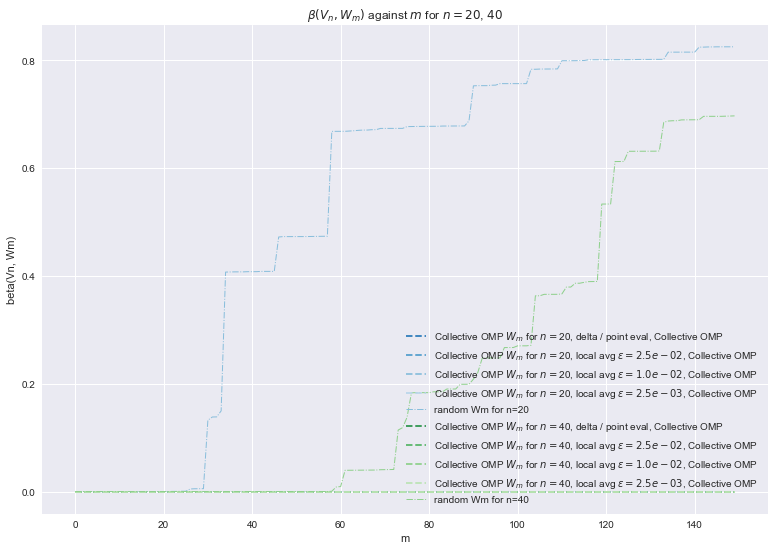

In [31]:
dict_label = [r'delta / point eval', r'local avg $\varepsilon={{{0:0.1e}}}$'.format(eps_1), r'local avg $\varepsilon={{{0:0.1e}}}$'.format(eps_2), r'local avg $\varepsilon={{{0:0.1e}}}$'.format(eps_3)]
line_style = ['--', ':', '-.', '-']
pals = [ 'Blues_r', 'Greens_r', 'Reds_r']
axs = []
fig = plt.figure(figsize=(13, 7))
ax = fig.add_subplot(1, 1, 1, title=r'$\beta(V_n, W_m)$ against $m$ for $n=20$, $40$')#, title=r'$\beta(V_n, W_m)$ against $m$ for various $n$')
for i, n in enumerate(ns):
    sns.set_palette(pals[i])
    cp = sns.color_palette()
    for k, dictionary in enumerate(dictionaries):
        plt.plot(range(m), bs_wcomp[i, :, k], line_style[k], label=r'Worst-Case OMP $W_m$ for $n$={0}, {1}'.format(n, dict_label[k]), color=cp[k])

ax.set(xlabel='m', ylabel=r'$\beta(V_n, W_m)$')#r'$m$', ylabel=r'$\beta(V_n, W_m)$')
plt.legend(loc=4)
plt.savefig('WCOMPAvgVsDelta.pdf')
plt.show()

fig = plt.figure(figsize=(13, 9))
ax = fig.add_subplot(1, 1, 1, title=r'$\beta(V_n, W_m)$ against $m$ for $n=20$, $40$')#, title=r'$\beta(V_n, W_m)$ against $m$ for various $n$')
for i, n in enumerate(ns):
    sns.set_palette(pals[i])
    cp = sns.color_palette() 
    for k, dictionary in enumerate(dictionaries):
        plt.plot(range(m), bs_comp[i, :, k], '--', label=r'Collective OMP $W_m$ for $n=${0}, {1}, Collective OMP'.format(n, dict_label[k]), color=cp[k+1])
    plt.plot(range(m), bs_rand[i, :], '-.', label=r'random Wm for n={0}'.format(n), color=cp[k], lw=1)

ax.set(xlabel='m', ylabel='beta(Vn, Wm)')#r'$m$', ylabel=r'$\beta(V_n, W_m)$')
plt.legend(loc=4)
plt.show()